# Data Analyst Nanodegree - Project 2 - Investigate a dataset: No-show Appointements

## Table of Contents
<ul>
<li><a href="#objective">Objective</a></li>
<li><a href="#premisses">Premisses</a></li>
<li><a href="#datawrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='objective'></a>
## Objective

The objective of this analysis is to explore data on scheduling appointments in Brazil, to understand what the characteristics of patients who usually miss these appointments. Knowing the characteristics of the patients, we can predict the absences and take measures to engage the patients and make them attend the appointment. So, we want to know:
- What the proportion of patients who miss the appointments ?
- Has the proportion of patients who missed their appointment increased in the past few months?
- Of the patients who miss the appointment, what is the distribution by gender?
- What neighborhood is the highest concentration of patients who miss the appointment?
- What is the correlation between patients who miss appointments and the variables gender, age, scolarship, Hypertension, Diabetes and Alcoholism?
- Did the patients who missed the appointment receive an SMS?



<a id='premisses'></a>
## Premisses
The data has the characteristcs below:
- 100k medical appointments in Brazil
- To learn more about the data access [here](https://www.kaggle.com/joniarroba/noshowappointments)

<a id='datawrangling'></a>
## Data Wrangling

#### Import libs

In [76]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline


#### Import data

In [77]:
os.getcwd()

'C:\\Users\\mayke\\Documents\\Cursos\\Data-Analyst-Nanodegree\\projects\\project-2-investigate-dataset\\notebooks'

In [78]:
df = pd.read_csv('C:\\Users\\mayke\\Documents\\Cursos\\Data-Analyst-Nanodegree\\projects\\project-2-investigate-dataset\\data\\noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Manipulating the data

In [79]:
#Checking the data type
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [80]:
#Checking duplicated data using AppointmentID
df.duplicated('AppointmentID').sum()

0

In [81]:
#Check uniquue values for variables
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [82]:
#Checking Handcap variable
df.groupby('Handcap').count()['AppointmentID']
#we haven't more information about handcap variable

Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: AppointmentID, dtype: int64

In [83]:
#Checking null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [84]:
#Creating a clean dataset and casting dates variables
df_clean = df
df_clean['ScheduledDay'] = pd.to_datetime(df_clean.ScheduledDay,infer_datetime_format=True)
df_clean['AppointmentDay'] = pd.to_datetime(df_clean.AppointmentDay,infer_datetime_format=True)

In [85]:
df_clean.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [86]:
#Checking min and max for each date variable
df_clean.ScheduledDay.describe()

count                  110527
unique                 103549
top       2016-05-06 07:09:54
freq                       24
first     2015-11-10 07:13:56
last      2016-06-08 20:07:23
Name: ScheduledDay, dtype: object

In [87]:
df_clean.AppointmentDay.describe()
#Many appointments were pointed out in the system with delay, but this does not interfere in the ScheduledDay analysis

count                  110527
unique                     27
top       2016-06-06 00:00:00
freq                     4692
first     2016-04-29 00:00:00
last      2016-06-08 00:00:00
Name: AppointmentDay, dtype: object

In [88]:
df_clean.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [89]:
#Rename variables for the standard names
df_clean.rename(columns = {'AppointmentID': 'AppointmentId','SMS_received': 'SmsReceived','No-show': 'NoShow'} , inplace = True)

In [90]:
df_clean.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SmsReceived,NoShow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [91]:
#Checking data statistics
df_clean.describe()

,PatientId,AppointmentId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SmsReceived
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


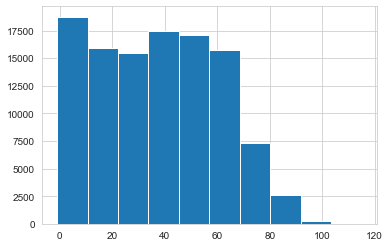

In [92]:
#Cheking age distribuition
df_clean.Age.hist();

In [93]:
df_clean.groupby('Age').count()['AppointmentId'].head()
#We have and incosistent row with -1 for age.

Age
-1       1
 0    3539
 1    2273
 2    1618
 3    1513
Name: AppointmentId, dtype: int64

In [94]:
#Removing incosistent row with -1 for age
df_clean = df_clean[(df_clean['Age'] >= 0)]

In [95]:
df_clean.describe()

,PatientId,AppointmentId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SmsReceived
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [96]:
#Creating an aggroupment of age using human age cycle
labels = ['Infant','Teen','Adult','Old']
bins = [0,12,21,60,150]
df_clean['AgeCycle'] = pd.cut(df_clean['Age'],bins=bins,labels=labels,include_lowest=True);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [97]:
#Checking the cut result
df_clean.groupby('AgeCycle').describe()['Age']

,count,mean,std,min,25%,50%,75%,max
AgeCycle,,,,,,,,
Infant,21036.0,4.969243,3.882706,0.0,1.0,5.0,8.0,12.0
Teen,12264.0,17.253262,2.505826,13.0,15.0,17.0,19.0,21.0
Adult,57464.0,41.468154,11.194642,22.0,32.0,42.0,51.0,60.0
Old,19762.0,70.856695,8.015401,61.0,64.0,69.0,76.0,115.0


In [98]:
#Checking Alcoholism describe for each Age Cycle
df_clean.groupby('AgeCycle').describe()['Alcoholism']

,count,mean,std,min,25%,50%,75%,max
AgeCycle,,,,,,,,
Infant,21036.0,0.000618,0.024852,0.0,0.0,0.0,0.0,1.0
Teen,12264.0,0.002854,0.053348,0.0,0.0,0.0,0.0,1.0
Adult,57464.0,0.044845,0.206966,0.0,0.0,0.0,0.0,1.0
Old,19762.0,0.037193,0.189238,0.0,0.0,0.0,0.0,1.0


In [99]:
#Check Null Values
df_clean[df_clean.AgeCycle.isnull()].head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SmsReceived,NoShow,AgeCycle


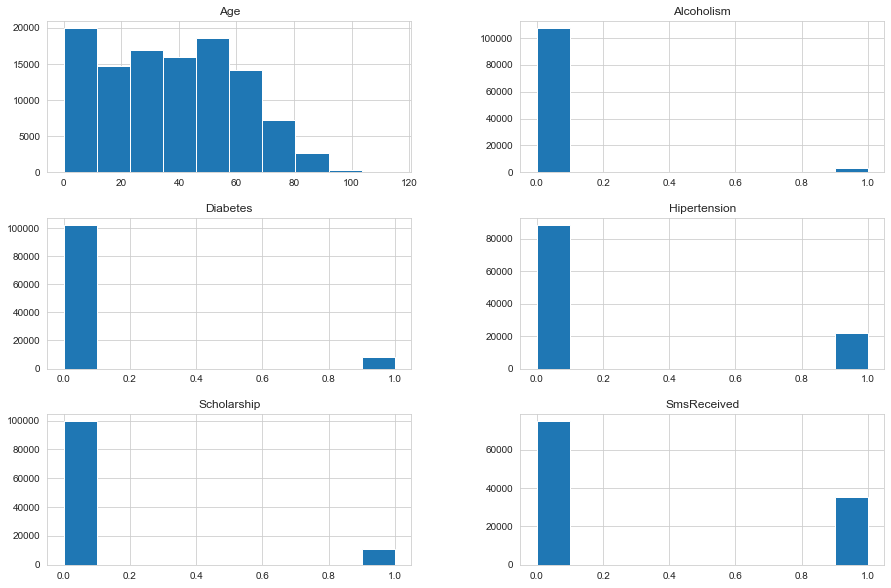

In [100]:
#Cheking the data distribution
df_clean[['Age','Alcoholism','Diabetes','Hipertension','Scholarship','SmsReceived']].hist(figsize=[15,10]);

In [101]:
df_clean.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SmsReceived,NoShow,AgeCycle
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Old
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Old
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Infant
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult


In [102]:
#If we check patients' recurrence, do we have outliers that can affect the analysis?
df_patients = df_clean.groupby('PatientId').count()['AppointmentId'].reset_index().rename(columns={'AppointmentId': 'qtd'})

In [103]:
#Checking statistics
df_patients.describe()

,PatientId,qtd
count,6.229800e+04,62298.000000
mean,1.471660e+14,1.774150
std,2.549080e+14,1.770336
min,3.921784e+04,1.000000
25%,4.176935e+12,1.000000
50%,3.198294e+13,1.000000
75%,9.484763e+13,2.000000
max,9.999816e+14,88.000000


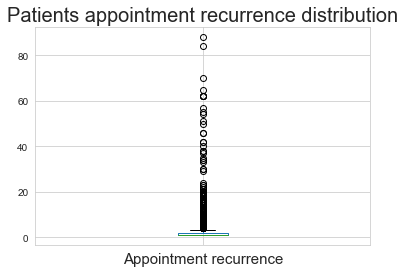

In [104]:
#ploting
df_patients.boxplot('qtd');
plt.title('Patients appointment recurrence distribution',fontsize=20)
plt.xticks([1],['Appointment recurrence'],fontsize=15);

As we can see in boxplot, we have outliers when checking recurrence of patients.

In [105]:
#Removing outliers using IQR
Q1 = df_patients['qtd'].quantile(0.25)
Q3 = df_patients['qtd'].quantile(0.75)
IQR = Q3 - Q1
lower_outliers = Q1-1.5*IQR
upper_outliers = Q3+1.5*IQR
df_patients_clean = df_patients[(df_patients['qtd'] >= lower_outliers) & (df_patients['qtd'] <= upper_outliers)]

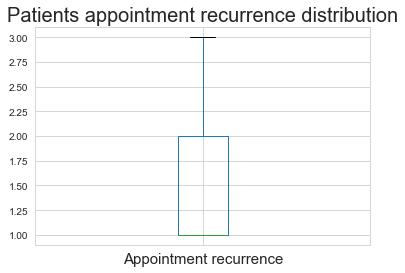

In [106]:
df_patients_clean.boxplot('qtd')
plt.title('Patients appointment recurrence distribution',fontsize=20)
plt.xticks([1],['Appointment recurrence'],fontsize=15);

Now we have data free of outliers.

In [107]:
#Merging with original the data
df_clean_2 = pd.merge(df_clean,df_patients_clean,on='PatientId')

In [108]:
df_clean_2.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SmsReceived,NoShow,AgeCycle,qtd
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Old,2
1,2.987250e+13,5639907,F,2016-04-29 09:47:47,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Old,2
2,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult,2
3,5.589978e+14,5642211,M,2016-04-29 15:20:47,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult,2
4,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Old,2


To summary what i have done in this step:
- Changed de variables ScheduledDay and AppointmentDay to date type
- Renamed variables AppointmentID, SMS_received and No-show for the standard names
- Removed incosistent row with -1 for age
- Created an aggroupment of age using human age cycle
- Removed outliers of patient for missed appoitments recurrence

<a id='eda'></a>
## Exploratory Data Analysis

In [109]:
#Creating function to calculate percentage for up 2 columns, to use on all eda process
def calculate_pct(data,grouped_columns,count_column):
    if len(grouped_columns) == 1:
        x = data.groupby(grouped_columns) \
        .agg({count_column: 'nunique'}) \
        .apply(lambda x: 100 * x / float(x.sum())) \
        .reset_index() \
        .rename(columns={count_column: 'pct'})
    else:
        x = data.groupby(grouped_columns) \
        .agg({count_column: 'nunique'}) \
        .groupby(level=0) \
        .apply(lambda x: 100 * x / float(x.sum())) \
        .reset_index() \
        .rename(columns={count_column: 'pct'})
    return x

In [110]:
df_clean_2.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SmsReceived,NoShow,AgeCycle,qtd
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Old,2
1,2.987250e+13,5639907,F,2016-04-29 09:47:47,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Old,2
2,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult,2
3,5.589978e+14,5642211,M,2016-04-29 15:20:47,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult,2
4,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Old,2


#### What the proportion of missed appointments ?

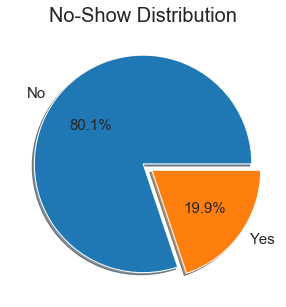

In [111]:
NoShow = calculate_pct(df_clean_2,['NoShow'],'AppointmentId')
pie, ax = plt.subplots(figsize=[10,5])
labels = NoShow['NoShow']
sizes = NoShow['pct']
explode = [0,0.1]
plt.pie(x=sizes, autopct="%.1f%%", labels=labels,explode=explode,textprops={'fontsize': 15},shadow=True)
plt.title("No-Show Distribution", fontsize=20);
pie.savefig('C:\\Users\\mayke\\Documents\\Cursos\\Data-Analyst-Nanodegree\\projects\\project-2-investigate-dataset\\notebooks\\images\\NoShow-Distribution.png')

As we can se, 20% appointment are missed.

#### Has the proportion of missed appointments increased in the past few months?

In [112]:
#Grouping the data
NoShowHist = df_clean_2[['AppointmentId','ScheduledDay','NoShow']]
NoShowHist['ScheduledDay'] =  NoShowHist['ScheduledDay'].dt.to_period('M')
NoShowHist = NoShowHist.rename(columns={'ScheduledDay': 'ScheduledMonth'})
NoShowHistPct = calculate_pct(NoShowHist,['ScheduledMonth','NoShow'],'AppointmentId')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [113]:
NoShowHistPct.head(10)

,ScheduledMonth,NoShow,pct
0,2015-12,No,68.333333
1,2015-12,Yes,31.666667
2,2016-01,No,68.000000
3,2016-01,Yes,32.000000
4,2016-02,No,75.225225
5,2016-02,Yes,24.774775
6,2016-03,No,67.063748
7,2016-03,Yes,32.936252
8,2016-04,No,68.946222
9,2016-04,Yes,31.053778


In [114]:
#Put the data in column to make a stacked bar plot
NoShowHistPct = NoShowHistPct.pivot_table('pct', ['ScheduledMonth'], 'NoShow')

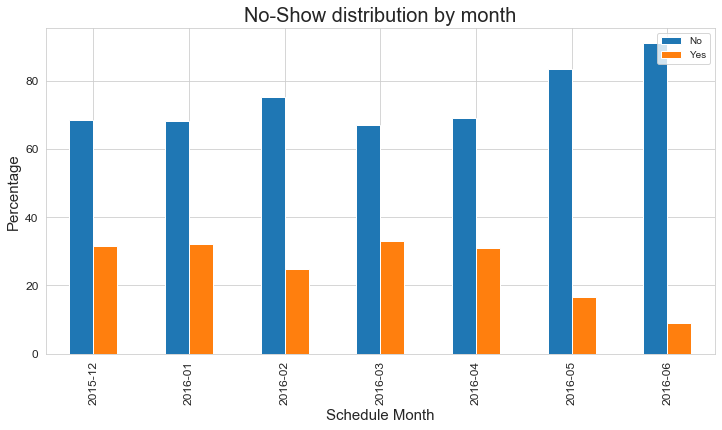

In [115]:
NoShowHistPct.plot(kind='bar',figsize=[12,6])
plt.legend(loc='upper right')
plt.xlabel('Schedule Month',fontsize=15)
plt.xticks(fontsize=12)                                                               
plt.ylabel('Percentage',fontsize=15);
plt.yticks(fontsize=12)   
plt.title('No-Show distribution by month',fontsize=20)
plt.savefig('C:\\Users\\mayke\\Documents\\Cursos\\Data-Analyst-Nanodegree\\projects\\project-2-investigate-dataset\\notebooks\\images\\NoShow-Month-Distribution.png')

Analyzing the distribution over the months, we can see:
- In 2016-04 to 2016-06 we had a reduction in the percentage of missed appointments when compared to the other months
- For months above, the percentage of missed appointments was between 15 and 30%, which gives an average of approximately 21%. Very similar to the all data percentage, what makes me believe that the biggest mass of data is here
- The percentage of missed appointments is dropping in the last 3 months

In [116]:
#But, what's the quantity of appointments per month ?
df_grouped = NoShowHist.groupby(['ScheduledMonth','NoShow']).count()['AppointmentId'].reset_index()

In [117]:
#Put the data in column to make a stacked bar plot
df_grouped = df_grouped.pivot_table('AppointmentId', ['ScheduledMonth'], 'NoShow')

Text(0.5, 1.0, 'No-Show distribution by month')

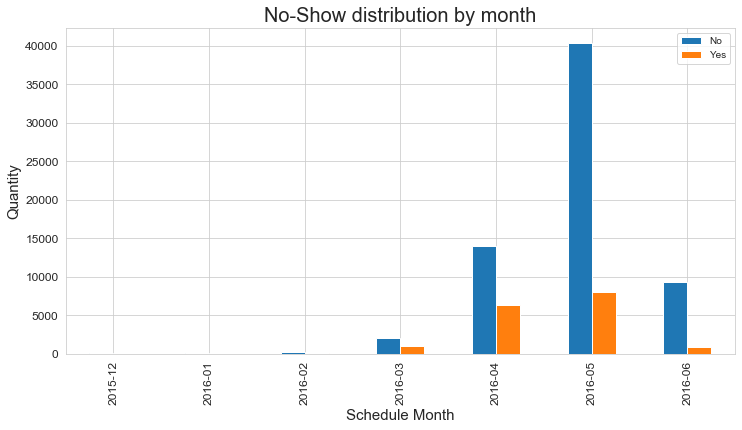

In [118]:
df_grouped.plot(kind='bar',figsize=[12,6])
plt.legend(loc='upper right')
plt.xlabel('Schedule Month',fontsize=15)
plt.xticks(fontsize=12)                                                               
plt.ylabel('Quantity',fontsize=15);
plt.yticks(fontsize=12)   
plt.title('No-Show distribution by month',fontsize=20)

Two points are noteworthy:

- The first 3 months have practically no appointments
- As the largest data mass is in the last 3 months

#### What is top 10 hospital neighborhood's with the highest concentration of missed appointment?

In [119]:
#Calculate the percentual and create a df with top 10 Neighbourhood
Neighbourhood = df_clean_2[df_clean_2['NoShow'] == 'Yes']
Neighbourhood = calculate_pct(Neighbourhood,['Neighbourhood'],'AppointmentId')
Neighbourhood = Neighbourhood.sort_values(by='pct',ascending=False).head(10)

In [120]:
#Checking the percentual of total summarizing top 10 Neighbourhood
Neighbourhood['pct'].sum()

38.192401960784316

In [121]:
#Checking total of Neighbourhood
df_clean_2['Neighbourhood'].describe()

count              82209
unique                81
top       JARDIM CAMBURI
freq                5596
Name: Neighbourhood, dtype: object

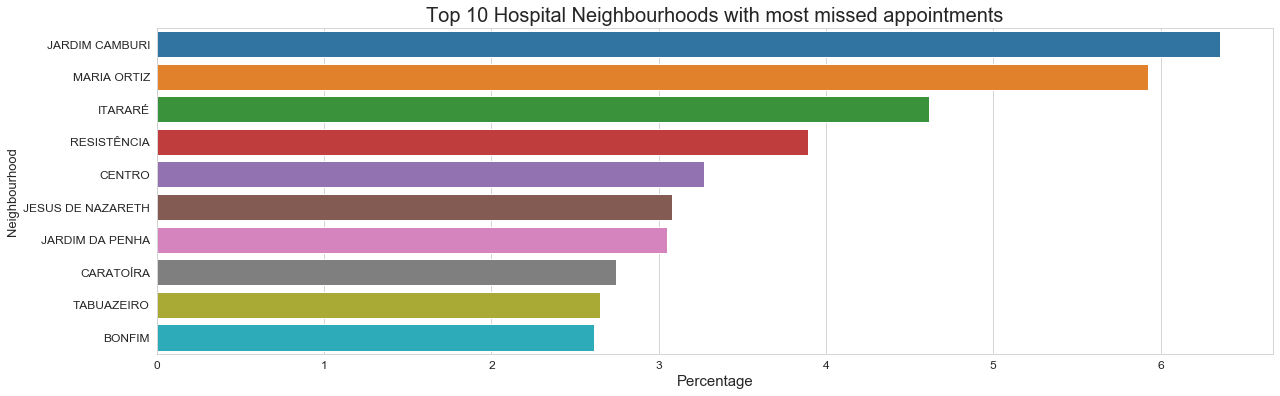

In [122]:
bar, ax = plt.subplots(figsize=[20,6])
sns.barplot(x="pct", y="Neighbourhood", data=Neighbourhood);
plt.xlabel('Percentage',fontsize=15)
plt.xticks(fontsize=12)                                                               
plt.ylabel('Neighbourhood',fontsize=13);
plt.yticks(fontsize=12)   
plt.title('Top 10 Hospital Neighbourhoods with most missed appointments',fontsize=20)
plt.savefig('C:\\Users\\mayke\\Documents\\Cursos\\Data-Analyst-Nanodegree\\projects\\project-2-investigate-dataset\\notebooks\\images\\NoShow-Neigh-Distribution.png')

The hospital on Jardim Camburi has the highest concentration of patients who missed the appointment, with about 6% of the total. However, when evaluating the top 10, there is no big difference in distribution.

But, when we analyse the top 10 listed above summarized, that are responsible for approximately 37% of missed appointments. If we take into account that the original dataset had 81 neighborhoods, we can say that there is a good concentration in the top 10.

#### What is the comparative between No-Show and gender?

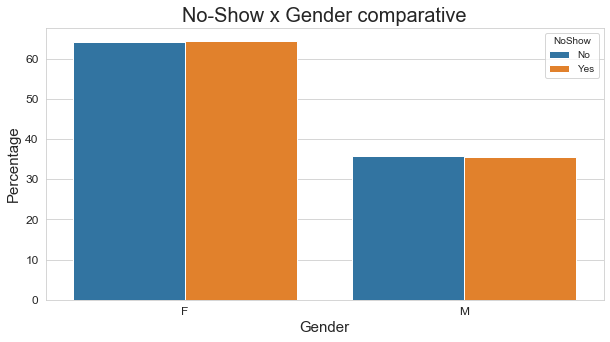

In [123]:
df_grouped = calculate_pct(df_clean_2,['NoShow', 'Gender'],'PatientId')
bar, ax = plt.subplots(figsize=[10,5])
sns.barplot(x='Gender',y='pct',hue='NoShow',data=df_grouped)
plt.xlabel('Gender',fontsize=15)
plt.xticks(fontsize=12)                                                               
plt.ylabel('Percentage',fontsize=15);
plt.yticks(fontsize=12)   
plt.title('No-Show x Gender comparative',fontsize=20)
plt.savefig('C:\\Users\\mayke\\Documents\\Cursos\\Data-Analyst-Nanodegree\\projects\\project-2-investigate-dataset\\notebooks\\images\\NoShow-Gender-Comp.png')


The gender distribuition is pretty much the same from pacients who missed the appointment and not missed.

#### What is the comparative between No-Show and age cycle?

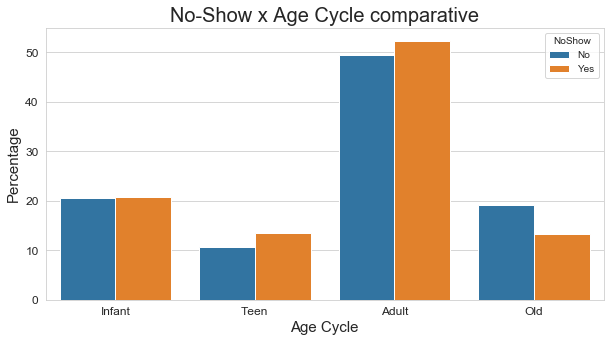

In [124]:
df_grouped = calculate_pct(df_clean_2,['NoShow', 'AgeCycle'],'PatientId')
bar, ax = plt.subplots(figsize=[10,5])
sns.barplot(x='AgeCycle',y='pct',hue='NoShow',data=df_grouped)
plt.xlabel('Age Cycle',fontsize=15)
plt.xticks(fontsize=12)                                                               
plt.ylabel('Percentage',fontsize=15);
plt.yticks(fontsize=12)   
plt.title('No-Show x Age Cycle comparative',fontsize=20)
plt.savefig('C:\\Users\\mayke\\Documents\\Cursos\\Data-Analyst-Nanodegree\\projects\\project-2-investigate-dataset\\notebooks\\images\\NoShow-AgeCycle-Comp.png')


Here we can identify some differences:
- Teens and adults tend to miss appointments more. This can be explained by the fact that it is a cycle of life that people are healthier.
- The old people usually miss appointments less. Contrary to what was reported above, it is a more fragile phase of life and this means that care needs to be greater.

#### What is the comparative between No-Show and scolarship?

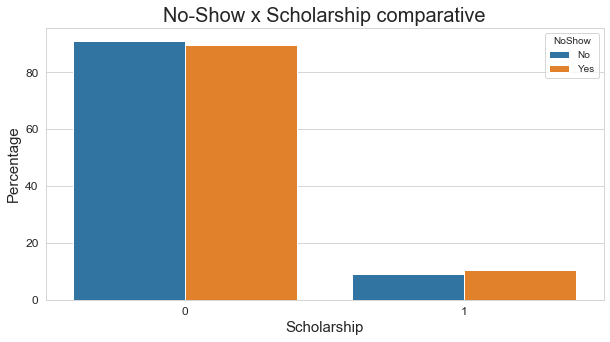

In [125]:
df_grouped = calculate_pct(df_clean_2,['NoShow', 'Scholarship'],'PatientId')
bar, ax = plt.subplots(figsize=[10,5])
sns.barplot(x='Scholarship',y='pct',hue='NoShow',data=df_grouped)
plt.xlabel('Scholarship',fontsize=15)
plt.xticks(fontsize=12)                                                               
plt.ylabel('Percentage',fontsize=15);
plt.yticks(fontsize=12)   
plt.title('No-Show x Scholarship comparative',fontsize=20)
plt.savefig('C:\\Users\\mayke\\Documents\\Cursos\\Data-Analyst-Nanodegree\\projects\\project-2-investigate-dataset\\notebooks\\images\\NoShow-Scholarship-Comp.png')


There is a small difference: patients who are part of the "Bolsa Família" program miss appointments more. As it is a program for people with low income and, consequently, greater difficulties in accessing education and health, this may be the greatest chance of missing the appointment. You can find more informatiosn about this program [here.](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)

#### What is the comparative between No-Show and Hypertension?

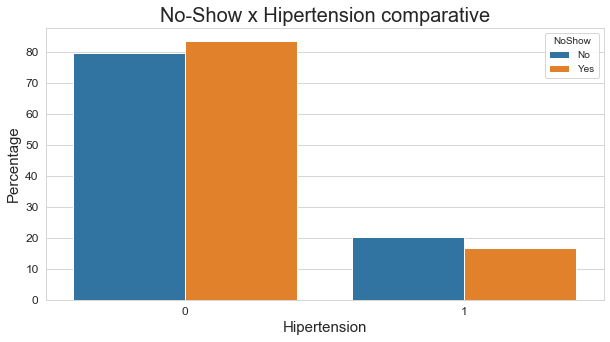

In [126]:
df_grouped = calculate_pct(df_clean_2,['NoShow', 'Hipertension'],'PatientId')
bar, ax = plt.subplots(figsize=[10,5])
sns.barplot(x='Hipertension',y='pct',hue='NoShow',data=df_grouped)
plt.xlabel('Hipertension',fontsize=15)
plt.xticks(fontsize=12)                                                               
plt.ylabel('Percentage',fontsize=15);
plt.yticks(fontsize=12)   
plt.title('No-Show x Hipertension comparative',fontsize=20)
plt.savefig('C:\\Users\\mayke\\Documents\\Cursos\\Data-Analyst-Nanodegree\\projects\\project-2-investigate-dataset\\notebooks\\images\\NoShow-Hipertension-Comp.png')


Patients who have hypertension are more frequent at appointments. This makes sense, since it is a problem that needs further monitoring.

#### What is the comparative between No-Show and Diabetes?

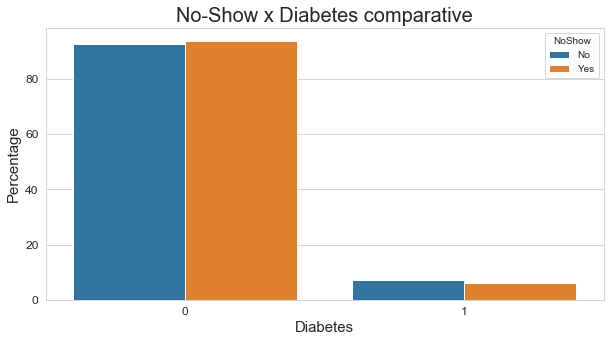

In [127]:
df_grouped = calculate_pct(df_clean_2,['NoShow', 'Diabetes'],'PatientId')
bar, ax = plt.subplots(figsize=[10,5])
sns.barplot(x='Diabetes',y='pct',hue='NoShow',data=df_grouped)
plt.xlabel('Diabetes',fontsize=15)
plt.xticks(fontsize=12)                                                               
plt.ylabel('Percentage',fontsize=15);
plt.yticks(fontsize=12)   
plt.title('No-Show x Diabetes comparative',fontsize=20)
plt.savefig('C:\\Users\\mayke\\Documents\\Cursos\\Data-Analyst-Nanodegree\\projects\\project-2-investigate-dataset\\notebooks\\images\\NoShow-Diabetes-Comp.png')


Diabetes does not seem to be related to missing appointments

#### What is the comparative between No-Show and Alcoholism?

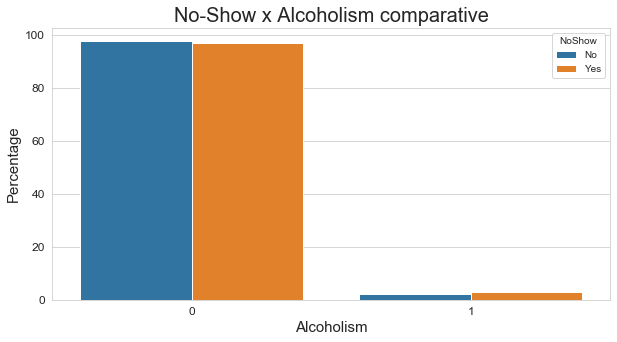

In [128]:
df_grouped = calculate_pct(df_clean_2,['NoShow', 'Alcoholism'],'PatientId')
bar, ax = plt.subplots(figsize=[10,5])
sns.barplot(x='Alcoholism',y='pct',hue='NoShow',data=df_grouped)
plt.xlabel('Alcoholism',fontsize=15)
plt.xticks(fontsize=12)                                                               
plt.ylabel('Percentage',fontsize=15);
plt.yticks(fontsize=12)   
plt.title('No-Show x Alcoholism comparative',fontsize=20)
plt.savefig('C:\\Users\\mayke\\Documents\\Cursos\\Data-Analyst-Nanodegree\\projects\\project-2-investigate-dataset\\notebooks\\images\\NoShow-Alcoholism-Comp.png')


Alcoholism does not seem to be related to missing appointments

#### Did the patients who missed the appointment receive an SMS?

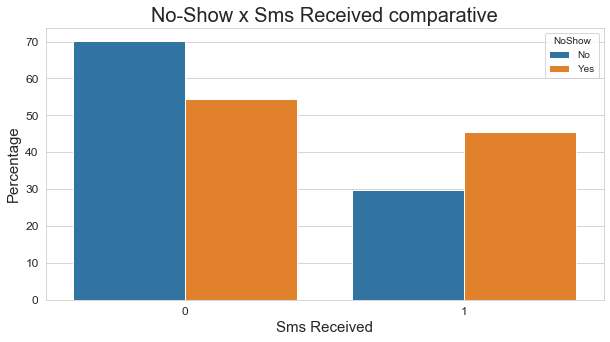

In [129]:
df_grouped = calculate_pct(df_clean_2,['NoShow', 'SmsReceived'],'AppointmentId')
bar, ax = plt.subplots(figsize=[10,5])
sns.barplot(x='SmsReceived',y='pct',hue='NoShow',data=df_grouped)
plt.xlabel('Sms Received',fontsize=15)
plt.xticks(fontsize=12)                                                               
plt.ylabel('Percentage',fontsize=15);
plt.yticks(fontsize=12)   
plt.title('No-Show x Sms Received comparative',fontsize=20)
plt.savefig('C:\\Users\\mayke\\Documents\\Cursos\\Data-Analyst-Nanodegree\\projects\\project-2-investigate-dataset\\notebooks\\images\\NoShow-SmsReceived-Comp.png')


As we can see, patients who received SMS missed appointments more. Well, this is not necessarily true as we do not have information in the data about the content of this SMS, which can be from a appointment reminder to a rescheduling SMS (which would justify the high concentration of receipt for those who missed the appointment)

<a id='conclusions'></a>
## Conclusions
Analyzing the data we can check the following conclusions
- Approximately 20% of appointments are missed. This percentage is falling when we look at the last 3 months present in the data
- Hospitals located in the top 10 neighborhoods with the highest percentage of missed appointments are responsible for about 37% of the total missed appointments
- Teens and adults are the most likely to miss the appointment. Old people tend to be more assiduous
- Hypertension patients take the appointment a little more seriously

Below you can check the details of the analysis and  the answers to the questions mentioned at the beginning of this document.

#### What the proportion of missed appointments ?
About of 20% of appointments are missed by patients:

![NoShow-Distribution](./images/NoShow-Distribution.png)

Analyzing the distribution over the months, we can see:

- In April/2016 to June/2016 we had a reduction in the percentage of missed appointments when compared to the other months
- For months above, the percentage of missed appointments was between 15 and 30%, which gives an average of approximately 21%. Very similar to the all data percentage, what makes me believe that the biggest mass of data is here
- The percentage of missed appointments is falling in the last 3 months

![NoShow-Month-Distribution](./images/NoShow-Month-Distribution.png)

#### What is top 10 hospital neighborhood's with the highest concentration of missed appointment?
The hospital on Jardim Camburi has the highest concentration of missed the appointments, with about 6% of the total. However, when evaluating the top 10, there is no big difference in distribution.

But, when we analyse the top 10 listed above summarized, that are responsible for approximately 37% of missed appointments. If we take into account that the original dataset had 81 neighborhoods, we can say that there is a good concentration in the top 10.

![NoShow-Neigh-Distribution](./images/NoShow-Neigh-Distribution.png)

#### What is the comparative between No-Show and age cycle?
About age cycle we can identify some differences:

- Teens and adults tend to miss appointments more. This can be explained by the fact that it is a cycle of life that people are healthier.
- The old people usually miss appointments less. Contrary to what was reported above, it is a more fragile phase of life and this means that care needs to be greater.

![NoShow-AgeCycle](./images/NoShow-AgeCycle-Comp.png)


#### What is the comparative between No-Show and gender? What about Alcoholism? And Diabetes ? And scolarship ?
This variables does not seem to be related to missed appointments:

<table>
  <tr>
    <td><img src="./images/NoShow-Gender-Comp.png" width=500 height=580></td>
    <td><img src="./images/NoShow-Alcoholism-Comp.png" width=500 height=580></td>
  </tr>
 </table>

<table>
  <tr>
    <td><img src="./images/NoShow-Diabetes-Comp.png" width=500 height=580></td>
    <td><img src="./images/NoShow-Scholarship-Comp.png" width=500 height=580></td>
  </tr>
 </table>

Just scolarship seems to have a small difference: patients who are part of the "Bolsa Família" program miss appointments more. As it is a program for people with low income and, consequently, greater difficulties in accessing education and health, this may be the greatest chance of missing the appointment. You can find more informatiosn about this program [here.](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
 
#### What is the comparative between No-Show and Hypertension?
Patients who have hypertension are more frequent at appointments. This makes sense, since it is a problem that needs further monitoring.

![NoShow-Distribution](./images/NoShow-Hipertension-Comp.png)

#### Did the patients who missed the appointment receive an SMS?
As we can see bellow, patients who received SMS missed appointments more. Well, this is not necessarily true as we do not have information in the data about the content of this SMS, which can be from a appointment reminder to a rescheduling SMS (which would justify the high concentration of receipt for those who missed the appointment).

![NoShow-AgeCycle](./images/NoShow-SmsReceived-Comp.png)


#### Analysis limitations
Although the data provided answers for most questions raised in the analysis, there are some limitations in the data that generate some limitations. We can quote:
- The neighborhood provided is that of hospitals. If we had the patients' neighborhood we could have a No-Show vision and understand if suddenly a poorer neighborhood tends to have more missing appointments, for example
- We don't have information about the numerical variable "Handcap"
- The mass of data is very small, providing data of practically 4 months. If we had a full year, it would be possible to check seasonality, for example
- We do not have information in the data about the content of SMS Received, which can be from a appointment reminder to a rescheduling SMS